In [2]:
import time
from math import sqrt

In [3]:
#Кластеризация на основе минимального остовного дерева, максимизирующая минимальное межкластерное расстояние
def Kruskal(n, m, g, num):
    #g - вектор(вес ребра, вершина 1, вершина 2)
    cost = n
    res_my = [[] for i in range(num)]
    res = list()
    ind = 0
    #n - количество вершин, m - количество ребер
    g.sort() #сначала отсортируем все ребра по весу, чтобы сначала рассматривать ребра с наименьшим весом
    tree_ind = [0 for i in range(n)]
    for i in range(n):
        tree_ind[i] = i  #сопоставим сначала каждой вершине свое дерево
    for j in range(m): #затем пройдемся по всем ребрам
        l = g[j][0] # вес ребра
        a = g[j][1] # вершина 1
        b = g[j][2] # вершина 2
        if (tree_ind[a] != tree_ind[b]): #проверяем, что вершины не принадлежат одному дереву
            cost -= 1
            res.append((a, b)) #добавляем ребро к ответу
            old_ind = tree_ind[b] #объединяем деревья
            new_ind = tree_ind[a]
            for k in range(n): 
                if (tree_ind[k] == old_ind): #для всех вершин из того поддерева, которое мы объединили
                    tree_ind[k] = new_ind #говорим, что они теперь в том дереве с которым объединили
            if (cost == num): #объядиняем деревья до тех пор пока их не станет столько, сколько нам нужно кластеров
                break
    
    return tree_ind #в результате все вершины будут принадлежать одному дереву и мы найдем минимальный остов

In [4]:
#Кластеризация, приближенно минимизирующая максимальное внутрикластерное расстояние.
def Clasterization(n, m, adj, num): 
    centers = set()
    centers.add(0) #сначала берем в качестве центра любую рандомную вершину
    center_i = []
    center_i.append(0)
    centers.add(adj[0][-1][1]) #в качестве следующего центра берем вершину, находяющуюся на самом большом расстоянии от 1 ценрта
    center_i.append(adj[0][-1][1])
    for i in range(2, num): #для каждого следующего центра:
        cur = [] #массив в котором лежат ближаюшие вершины для каждого центра (и вес ребра до нее)
        for j in range(len(centers)): #для каждого центра 
            for el in adj[center_i[j]]: #ищем вершину на наименьшем расстоянии, которая при этом не центр кластера
                if (el[1] not in centers):
                    cur.append(el)
                    break #если нашли такую вершину, то заканчиваем поиск
        cur.sort() #сортируем ближайшие вершины для каждого кластера по расстоянию
        centers.add(cur[-1][1]) #делаем центром вершину, находящуюся на максимальном расстоянии из найденных
        center_i.append(cur[-1][1])
    
    nodes_ind = [0 for i in range(n)] #создаем массив, которые отвчает за номер кластера для каждой вершины
    
    for i in range(num):
        nodes_ind[center_i[i]] = center_i[i]
        
    max_min_dist = [0 for i in range(n)]
    for i in range(n):
        if i not in centers: #если вершина не является центром, но хотим найти какому кластеру она принадлежит
            for el in adj[i]:
                if (el[1] in centers): #находим центр кластера, растояние до которого от данной вершины минимально
                    nodes_ind[i] = el[1] #и собственно относим вершину к этому кластеру
                    if (el[0] > max_min_dist[el[1]]):
                        max_min_dist[el[1]] = el[0]
                    break
    print('Max dist inside the clusters:', max(max_min_dist))
    return nodes_ind

In [5]:
#Превращаем нашу матрицу edges в список смежности с парами [вес ребра, вершина]
def Adj(n, m, g):
    adj = [[] for k in range(n)]
    for i in range(m):
        adj[g[i][1]].append([g[i][0], g[i][2]])
        adj[g[i][2]].append([g[i][0], g[i][1]])
    for el in adj:
        el.sort()
    return adj

In [7]:
def distance_1(title1, title2, num_of_words):
    # simple vec distance
    id1 = 0
    id2 = 0
    vec = []
    while id1 < len(title1) and id2 < len(title2):
        x = y = 0
        word1 = title1[id1][0]
        word2 = title2[id2][0]
        if word1 <= word2:
            x = title1[id1][1]
            id1 += 1
        if word1 >= word2:
            y = title2[id2][1]
            id2 += 1
        vec.append(abs(x - y))
    while id1 < len(title1):
        vec.append(title1[id1][1])
        id1 += 1
    while id2 < len(title2):
        vec.append(title2[id2][1])
        id2 += 1
    return sqrt(sum(map(lambda x: x * x, vec)))



In [8]:
def distance_2(title1, title2, num_of_words):
    # manhattan vec distance
    id1 = 0
    id2 = 0
    vec = []
    while id1 < len(title1) and id2 < len(title2):
        x = y = 0
        word1 = title1[id1][0]
        word2 = title2[id2][0]
        if word1 <= word2:
            x = title1[id1][1]
            id1 += 1
        if word1 >= word2:
            y = title2[id2][1]
            id2 += 1
        vec.append(abs(x - y))
    while id1 < len(title1):
        vec.append(title1[id1][1])
        id1 += 1
    while id2 < len(title2):
        vec.append(title2[id2][1])
        id2 += 1
    return sum(vec)


In [9]:
def distance_3(title1, title2, num_of_words):
    # Pearson
    x = [0] * num_of_words
    for elem in title1:
        x[elem[0] - 1] += elem[1]
    y = [0] * num_of_words
    for elem in title2:
        y[elem[0] - 1] += elem[1]
    x_m = sum(x) / len(x)
    y_m = sum(y) / len(y)
    x = [x[_] - x_m for _ in range(len(x))]
    y = [y[_] - y_m for _ in range(len(x))]
    a = sum([x[_] * y[_] for _ in range(len(x))])
    b = sum([x[_] * x[_] for _ in range(len(x))])
    c = sum([y[_] * y[_] for _ in range(len(x))])
    if a == 0:
        return 1
    return 1 - (a / sqrt(b * c))


In [10]:
def cluster(n, m, graph, num):
    res = Kruskal(n, m, graph, num)
    return res

In [27]:
t_start = time.time()

# input file
filename = 'test_50.txt'

# function of distance
distance = distance_1

# clusters num
clusters_num = 10

# word freq param
min_count = 2
max_count = 10

vertices = []
with open(filename) as f:
    doc_num = int(f.readline())
    words_num = int(f.readline())
    lines_num = int(f.readline())
    words_count = [0] * words_num
    vertices = [[] for _ in range(doc_num)]
    for i in range(lines_num):
        docID, wordID, count = map(int, f.readline().split())
        words_count[wordID - 1] += count
        if count <= max_count:
            vertices[docID - 1].append([wordID, count])

new_v = []
for elem in vertices:
    new_v.append([])
    for k in elem:
        if min_count <= words_count[k[0] - 1] <= max_count:
            new_v[-1].append(k)
    if len(new_v[-1]) == 0:
        print("Warning: vertex without words")
vertices = new_v
print('Vertices:', len(vertices))

edges = [(distance(vertices[i], vertices[j], words_num), i, j) for i in range(len(vertices) - 1) for j in range(i + 1, len(vertices))]
print('Edges:', len(edges))

components = cluster(len(vertices), len(edges), edges, clusters_num)

comp = components
d = dict()
for i in range(len(comp)):
    if comp[i] not in d:
        d[comp[i]] = [i + 1]
    else:
        d[comp[i]].append(i + 1)
count = 1
for elem in d:
    print("Cluster", count, ":", len(d[elem]), "elems", ":", d[elem])
    count += 1

print("Time:", time.time() - t_start)


Vertices: 50
Edges: 1225
Cluster 1 : 40 elems : [1, 2, 3, 4, 5, 8, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 49]
Cluster 2 : 1 elems : [6]
Cluster 3 : 1 elems : [7]
Cluster 4 : 1 elems : [9]
Cluster 5 : 1 elems : [11]
Cluster 6 : 1 elems : [18]
Cluster 7 : 2 elems : [22, 24]
Cluster 8 : 1 elems : [40]
Cluster 9 : 1 elems : [48]
Cluster 10 : 1 elems : [50]
Time: 0.643970251083374


In [13]:
t_start = time.time()

# input file
filename = 'test_400.txt'

# function of distance
distance = distance_2

# clusters num
clusters_num = 5

# word freq param
min_count = 2
max_count = 10

vertices = []
with open(filename) as f:
    doc_num = int(f.readline())
    words_num = int(f.readline())
    lines_num = int(f.readline())
    words_count = [0] * words_num
    vertices = [[] for _ in range(doc_num)]
    for i in range(lines_num):
        docID, wordID, count = map(int, f.readline().split())
        words_count[wordID - 1] += count
        if count <= max_count:
            vertices[docID - 1].append([wordID, count])

new_v = []
for elem in vertices:
    new_v.append([])
    for k in elem:
        if min_count <= words_count[k[0] - 1] <= max_count:
            new_v[-1].append(k)
    if len(new_v[-1]) == 0:
        print("Warning: vertex without words")
vertices = new_v
print('Vertices:', len(vertices))

edges = [(distance(vertices[i], vertices[j], words_num), i, j) for i in range(len(vertices) - 1) 
         for j in range(i + 1, len(vertices))]
print('Edges:', len(edges))

components = cluster(len(vertices), len(edges), edges, clusters_num)

comp = components
d = dict()
for i in range(len(comp)):
    if comp[i] not in d:
        d[comp[i]] = [i + 1]
    else:
        d[comp[i]].append(i + 1)
count = 1
for elem in d:
    print("Cluster", count, ":", len(d[elem]), "elems", ":", d[elem])
    count += 1

print("Time:", time.time() - t_start)


Vertices: 400
Edges: 79800
Cluster 1 : 391 elems : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 

In [14]:
t_start = time.time()

# input file
filename = 'test_50.txt'

# function of distance
distance = distance_3

# clusters num
clusters_num = 5

# word freq param
min_count = 2
max_count = 10

vertices = []
with open(filename) as f:
    doc_num = int(f.readline())
    words_num = int(f.readline())
    lines_num = int(f.readline())
    words_count = [0] * words_num
    vertices = [[] for _ in range(doc_num)]
    for i in range(lines_num):
        docID, wordID, count = map(int, f.readline().split())
        words_count[wordID - 1] += count
        if count <= max_count:
            vertices[docID - 1].append([wordID, count])

new_v = []
for elem in vertices:
    new_v.append([])
    for k in elem:
        if min_count <= words_count[k[0] - 1] <= max_count:
            new_v[-1].append(k)
    if len(new_v[-1]) == 0:
        print("Warning: vertex without words")
vertices = new_v
print('Vertices:', len(vertices))

edges = [(distance(vertices[i], vertices[j], words_num), i, j) for i in range(len(vertices) - 1) for j in range(i + 1, len(vertices))]
print('Edges:', len(edges))

components = cluster(len(vertices), len(edges), edges, clusters_num)

comp = components
d = dict()
for i in range(len(comp)):
    if comp[i] not in d:
        d[comp[i]] = [i + 1]
    else:
        d[comp[i]].append(i + 1)
count = 1
for elem in d:
    print("Cluster", count, ":", len(d[elem]), "elems", ":", d[elem])
    count += 1

print("Time:", time.time() - t_start)


Vertices: 50
Edges: 1225
Cluster 1 : 45 elems : [1, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50]
Cluster 2 : 1 elems : [2]
Cluster 3 : 2 elems : [4, 5]
Cluster 4 : 1 elems : [38]
Cluster 5 : 1 elems : [47]
Time: 9.977332353591919


Как мы можем заметить, результаты данной кластеризации довольно странный. Почти все вершины относятся к одному кластеру.
Но вообще. если задуматься о том, как работает алгорим Крускала, то данные результаты вполне нормальны. Если ребра имеют практически одинаковый вес, то алгоритм Крускала будет просто почти идти по порядку вершин и сливать вершины в деревья.

Далее идет кластеризация, приближенно минимизирующая максимальное внутрикластерное расстояние.

(А пока пускай тут будет фото панды, панды милые. Я бы тоже хотела быть как эта панда, но дедлайны сами себя не закроют :с)
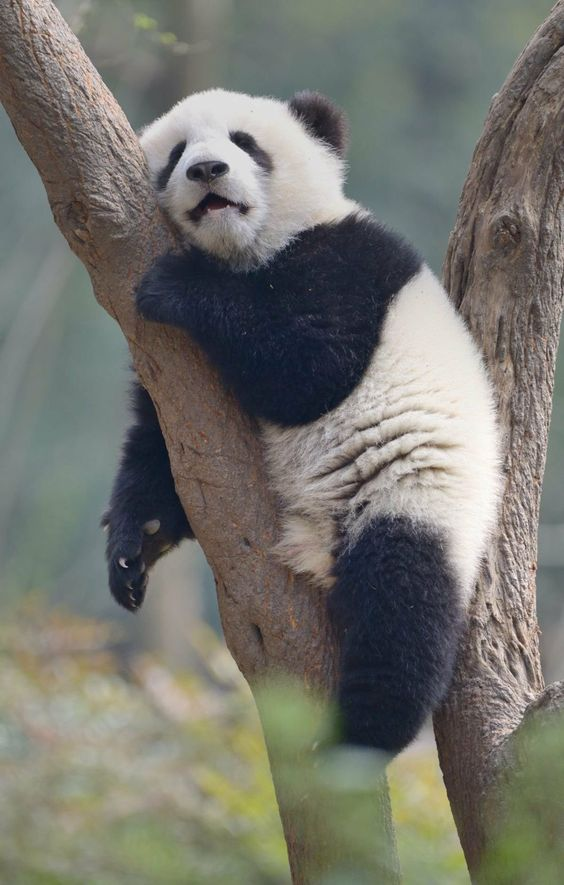

In [18]:
t_start = time.time()

# input file
filename = 'test_50.txt'

# function of distance
distance = distance_1

# clusters num
clusters_num = 5

# word freq param
min_count = 2
max_count = 10

vertices = []
with open(filename) as f:
    doc_num = int(f.readline())
    words_num = int(f.readline())
    lines_num = int(f.readline())
    words_count = [0] * words_num
    vertices = [[] for _ in range(doc_num)]
    for i in range(lines_num):
        docID, wordID, count = map(int, f.readline().split())
        words_count[wordID - 1] += count
        if count <= max_count:
            vertices[docID - 1].append([wordID, count])

new_v = []
for elem in vertices:
    new_v.append([])
    for k in elem:
        if min_count <= words_count[k[0] - 1] <= max_count:
            new_v[-1].append(k)
    if len(new_v[-1]) == 0:
        print("Warning: vertex without words")
vertices = new_v
print('Vertices:', len(vertices))

edges = [(distance(vertices[i], vertices[j], words_num), i, j) for i in range(len(vertices) - 1) for j in range(i + 1, len(vertices))]
print('Edges:', len(edges))

ad = Adj(len(vertices), len(edges), edges)
comp = Clasterization(len(vertices), len(edges), ad, clusters_num)
d = dict()
for i in range(len(comp)):
    if comp[i] not in d:
        d[comp[i]] = [i + 1]
    else:
        d[comp[i]].append(i + 1)
count = 1
for elem in d:
    print("Cluster", count, ":", len(d[elem]), "elems", ":", d[elem])
    count += 1

print("Time:", time.time() - t_start)

Vertices: 50
Edges: 1225
Max dist inside the clusters: 26.589471600616662
Cluster 1 : 1 elems : [1]
Cluster 2 : 44 elems : [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Cluster 3 : 2 elems : [3, 21]
Cluster 4 : 2 elems : [22, 24]
Cluster 5 : 1 elems : [25]
Time: 0.5654854774475098


In [23]:
t_start = time.time()

# input file
filename = 'test_50.txt'

# function of distance
distance = distance_2

# clusters num
clusters_num = 7

# word freq param
min_count = 2
max_count = 10

vertices = []
with open(filename) as f:
    doc_num = int(f.readline())
    words_num = int(f.readline())
    lines_num = int(f.readline())
    words_count = [0] * words_num
    vertices = [[] for _ in range(doc_num)]
    for i in range(lines_num):
        docID, wordID, count = map(int, f.readline().split())
        words_count[wordID - 1] += count
        if count <= max_count:
            vertices[docID - 1].append([wordID, count])

new_v = []
for elem in vertices:
    new_v.append([])
    for k in elem:
        if min_count <= words_count[k[0] - 1] <= max_count:
            new_v[-1].append(k)
    if len(new_v[-1]) == 0:
        print("Warning: vertex without words")
vertices = new_v
print('Vertices:', len(vertices))

edges = [(distance(vertices[i], vertices[j], words_num), i, j) for i in range(len(vertices) - 1) for j in range(i + 1, len(vertices))]
print('Edges:', len(edges))

ad = Adj(len(vertices), len(edges), edges)
comp = Clasterization(len(vertices), len(edges), ad, clusters_num)
d = dict()
for i in range(len(comp)):
    if comp[i] not in d:
        d[comp[i]] = [i + 1]
    else:
        d[comp[i]].append(i + 1)
count = 1
for elem in d:
    print("Cluster", count, ":", len(d[elem]), "elems", ":", d[elem])
    count += 1

print("Time:", time.time() - t_start)

Vertices: 50
Edges: 1225
Max dist inside the clusters: 347
Cluster 1 : 1 elems : [1]
Cluster 2 : 42 elems : [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Cluster 3 : 2 elems : [3, 21]
Cluster 4 : 2 elems : [22, 24]
Cluster 5 : 1 elems : [23]
Cluster 6 : 1 elems : [25]
Cluster 7 : 1 elems : [37]
Time: 0.4747288227081299


In [20]:
t_start = time.time()

# input file
filename = 'test_50.txt'

# function of distance
distance = distance_3

# clusters num
clusters_num = 5

# word freq param
min_count = 2
max_count = 10

vertices = []
with open(filename) as f:
    doc_num = int(f.readline())
    words_num = int(f.readline())
    lines_num = int(f.readline())
    words_count = [0] * words_num
    vertices = [[] for _ in range(doc_num)]
    for i in range(lines_num):
        docID, wordID, count = map(int, f.readline().split())
        words_count[wordID - 1] += count
        if count <= max_count:
            vertices[docID - 1].append([wordID, count])

new_v = []
for elem in vertices:
    new_v.append([])
    for k in elem:
        if min_count <= words_count[k[0] - 1] <= max_count:
            new_v[-1].append(k)
    if len(new_v[-1]) == 0:
        print("Warning: vertex without words")
vertices = new_v
print('Vertices:', len(vertices))

edges = [(distance(vertices[i], vertices[j], words_num), i, j) for i in range(len(vertices) - 1) for j in range(i + 1, len(vertices))]
print('Edges:', len(edges))

ad = Adj(len(vertices), len(edges), edges)
comp = Clasterization(len(vertices), len(edges), ad, clusters_num)
d = dict()
for i in range(len(comp)):
    if comp[i] not in d:
        d[comp[i]] = [i + 1]
    else:
        d[comp[i]].append(i + 1)
count = 1
for elem in d:
    print("Cluster", count, ":", len(d[elem]), "elems", ":", d[elem])
    count += 1

print("Time:", time.time() - t_start)

Vertices: 50
Edges: 1225
Max dist inside the clusters: 0.9967587996468054
Cluster 1 : 5 elems : [1, 11, 23, 25, 47]
Cluster 2 : 18 elems : [2, 7, 10, 12, 14, 15, 17, 18, 20, 27, 31, 36, 38, 39, 40, 41, 44, 50]
Cluster 3 : 14 elems : [3, 6, 13, 19, 22, 24, 28, 32, 33, 34, 42, 43, 46, 49]
Cluster 4 : 4 elems : [4, 5, 16, 29]
Cluster 5 : 9 elems : [8, 9, 21, 26, 30, 35, 37, 45, 48]
Time: 10.152048349380493


Тут уже, как можно заметить, результаты выглядят куда приятнее.